In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# loading the data
df = pd.read_csv("/content/drive/MyDrive/Machine Learning Project/marketing_campaign.csv", sep = "\t")

In [ ]:
# fisrt few rows
df.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# basic info

df.shape        # Number of rows and columns
df.info()       # Data types, missing values
df.columns      # List of all columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Summary Statistics

df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.describe(include=['object'])


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
df.dtypes

,0
ID,int64
Year_Birth,int64
Education,object
Marital_Status,object
Income,float64
Kidhome,int64
Teenhome,int64
Dt_Customer,object
Recency,int64
MntWines,int64


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# filling missing values

df['Income'] = df['Income'].fillna(df['Income'].mean())
# check missing va;ue after imputation
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,0
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1975
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


In [ ]:
constant_columns = [col for col in df.columns if df[col].nunique()==1]
print(f"Constant columns: {constant_columns}")
df = df.drop(columns=constant_columns, errors = 'ignore')
print(df.shape)

Constant columns: ['Z_CostContact', 'Z_Revenue']
(2240, 27)


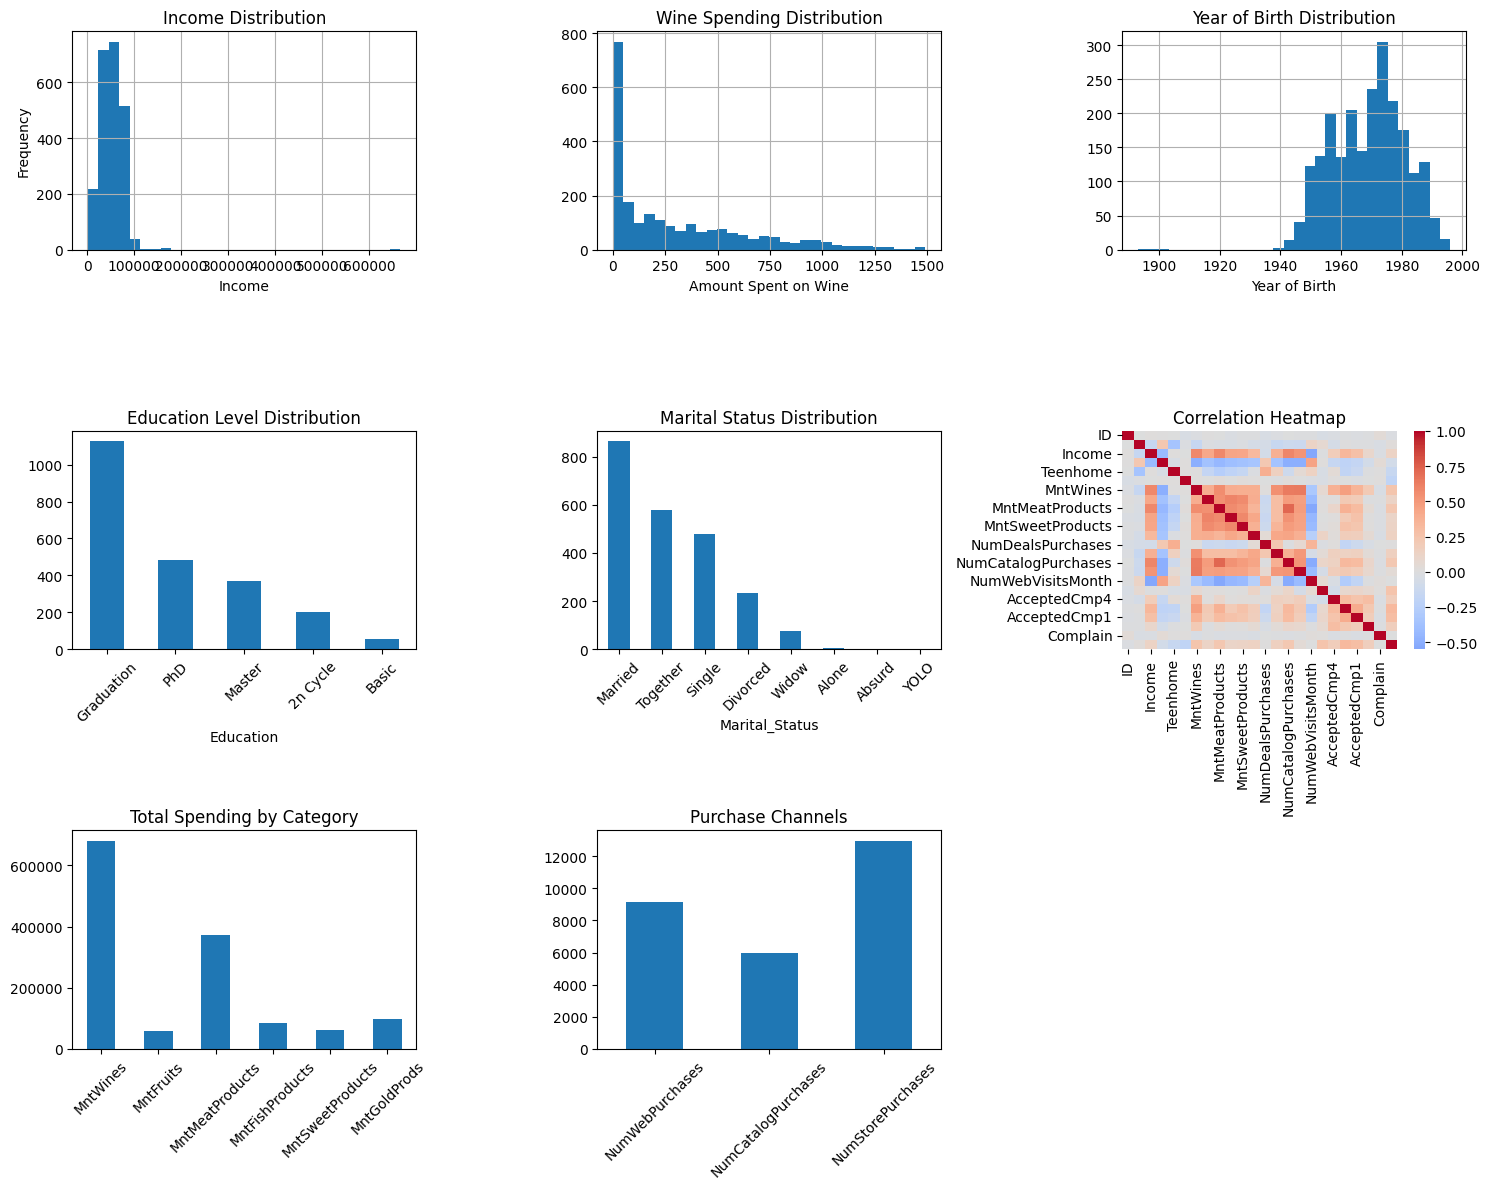

In [ ]:

# Exploratory Data Analysis
plt.figure(figsize=(15, 12))

# 1. Distribution of key numerical variables
plt.subplot(3, 3, 1)
df['Income'].hist(bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
df['MntWines'].hist(bins=30)
plt.title('Wine Spending Distribution')
plt.xlabel('Amount Spent on Wine')

plt.subplot(3, 3, 3)
df['Year_Birth'].hist(bins=30)
plt.title('Year of Birth Distribution')
plt.xlabel('Year of Birth')

# 2. Education level distribution
plt.subplot(3, 3, 4)
df['Education'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

# 3. Marital status distribution
plt.subplot(3, 3, 5)
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)

# 4. Correlation heatmap for numerical variables
plt.subplot(3, 3, 6)
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')

# 5. Total spending by category
plt.subplot(3, 3, 7)
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds']
total_spending = df[spending_cols].sum()
total_spending.plot(kind='bar')
plt.title('Total Spending by Category')
plt.xticks(rotation=45)

# 6. Purchase channels
plt.subplot(3, 3, 8)
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_totals = df[purchase_cols].sum()
purchase_totals.plot(kind='bar')
plt.title('Purchase Channels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

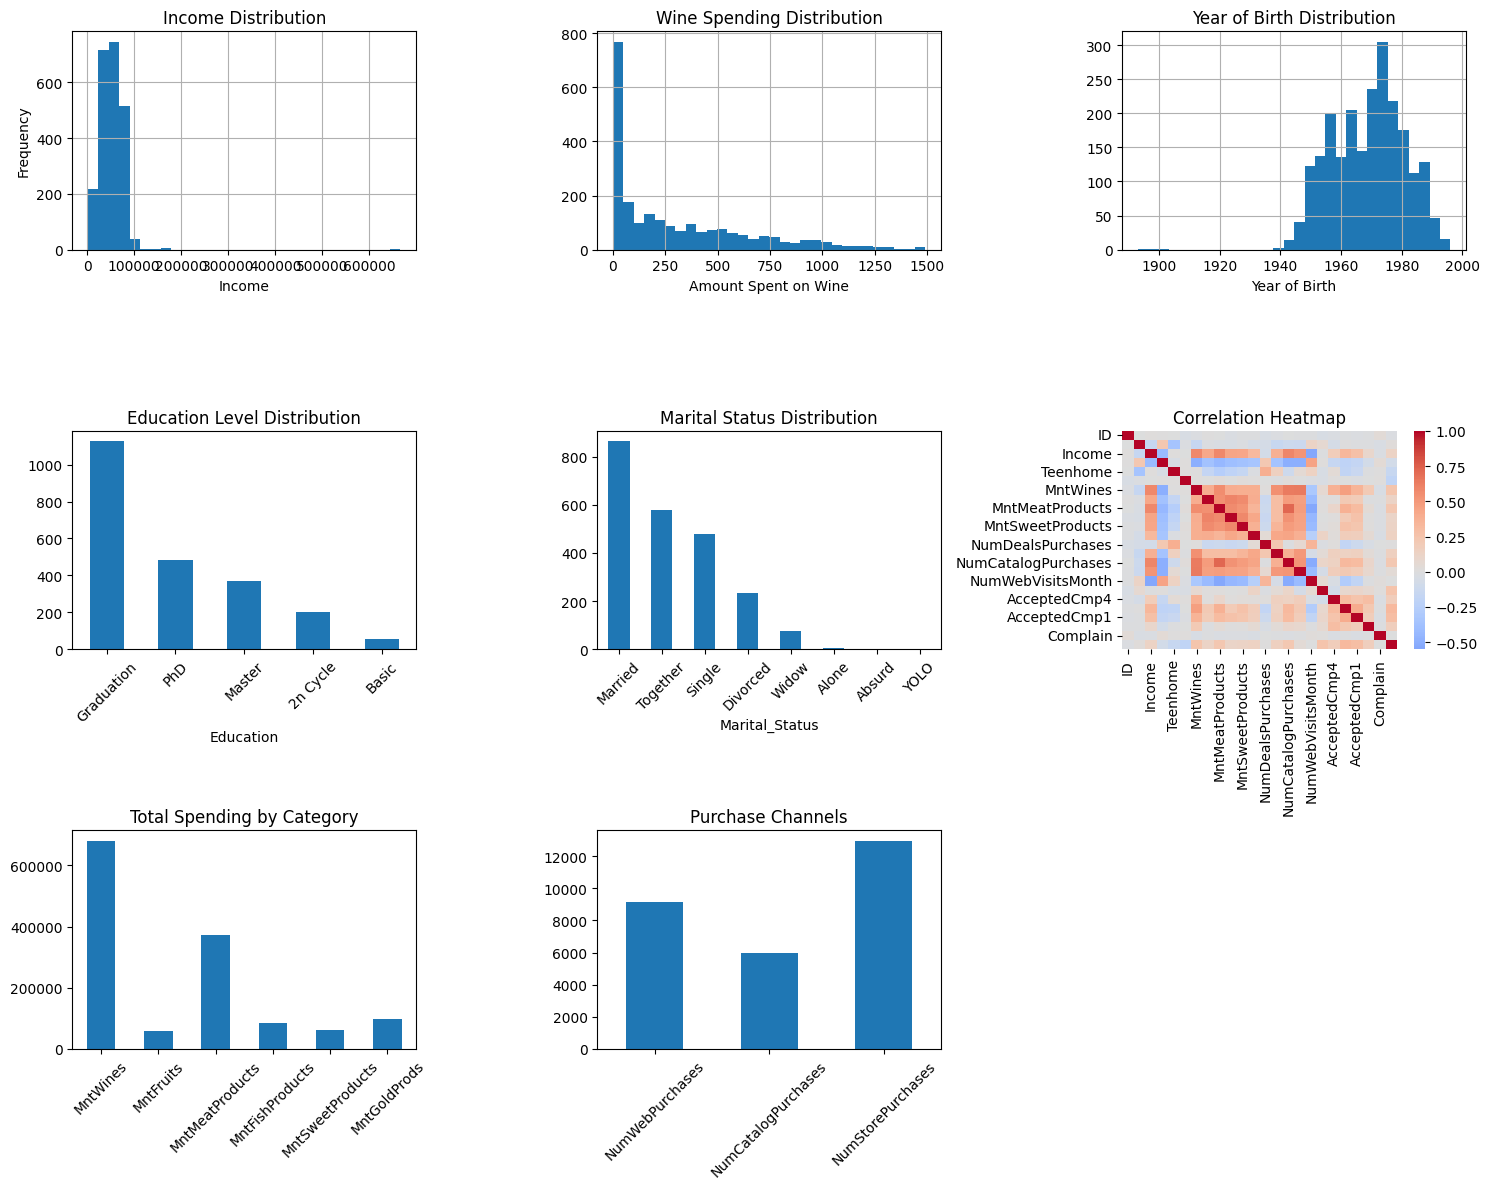

In [ ]:
# Exploratory Data Analysis
plt.figure(figsize=(15, 12))

# 1. Distribution of key numerical variables
plt.subplot(3, 3, 1)
df['Income'].hist(bins=30)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(3, 3, 2)
df['MntWines'].hist(bins=30)
plt.title('Wine Spending Distribution')
plt.xlabel('Amount Spent on Wine')

plt.subplot(3, 3, 3)
df['Year_Birth'].hist(bins=30)
plt.title('Year of Birth Distribution')
plt.xlabel('Year of Birth')

# 2. Education level distribution
plt.subplot(3, 3, 4)
df['Education'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)

# 3. Marital status distribution
plt.subplot(3, 3, 5)
df['Marital_Status'].value_counts().plot(kind='bar')
plt.title('Marital Status Distribution')
plt.xticks(rotation=45)

# 4. Correlation heatmap for numerical variables
plt.subplot(3, 3, 6)
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=False)
plt.title('Correlation Heatmap')

# 5. Total spending by category
plt.subplot(3, 3, 7)
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts', 'MntGoldProds']
total_spending = df[spending_cols].sum()
total_spending.plot(kind='bar')
plt.title('Total Spending by Category')
plt.xticks(rotation=45)

# 6. Purchase channels
plt.subplot(3, 3, 8)
purchase_cols = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
purchase_totals = df[purchase_cols].sum()
purchase_totals.plot(kind='bar')
plt.title('Purchase Channels')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Feature engineering and selection for clustering
# Select relevant features for clustering
clustering_features = [
    'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
    'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
    'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
    'NumWebVisitsMonth'
]

# Create a subset for clustering
X = df[clustering_features].copy()

# Encode categorical variables if any were selected
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    le = LabelEncoder()
    for col in categorical_cols:
        X[col] = le.fit_transform(X[col])

print("Features for clustering:")
print(X.columns.tolist())
print(f"Shape: {X.shape}")

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nData standardized for clustering")

Features for clustering:
['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
Shape: (2240, 16)

Data standardized for clustering


Number of components explaining 95% variance: 13


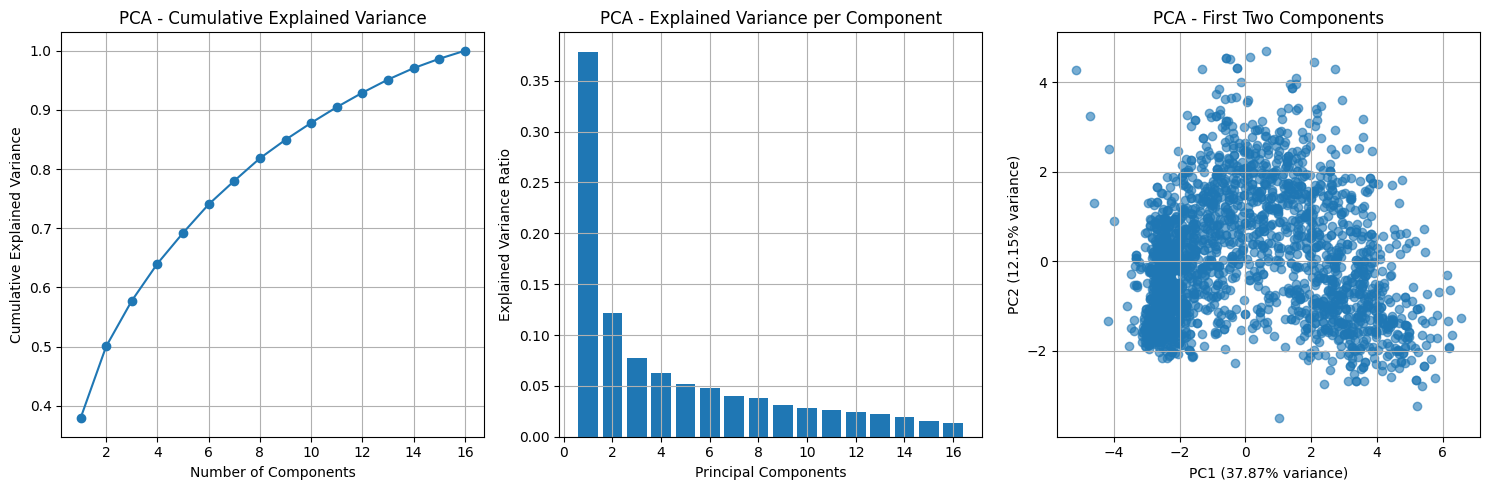

Original features: 16
PCA components: 13
Variance explained: 95.13%


In [ ]:

# PCA for dimensionality reduction and visualization
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance per Component')
plt.grid(True)

# Choose number of components that explain 95% of variance
n_components = np.argmax(pca.explained_variance_ratio_.cumsum() >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Apply PCA with selected components
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%} variance)')
plt.title('PCA - First Two Components')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Original features: {X_scaled.shape[1]}")
print(f"PCA components: {X_pca_final.shape[1]}")
print(f"Variance explained: {pca_final.explained_variance_ratio_.sum():.2%}")

Optimal number of clusters (K-means): 2


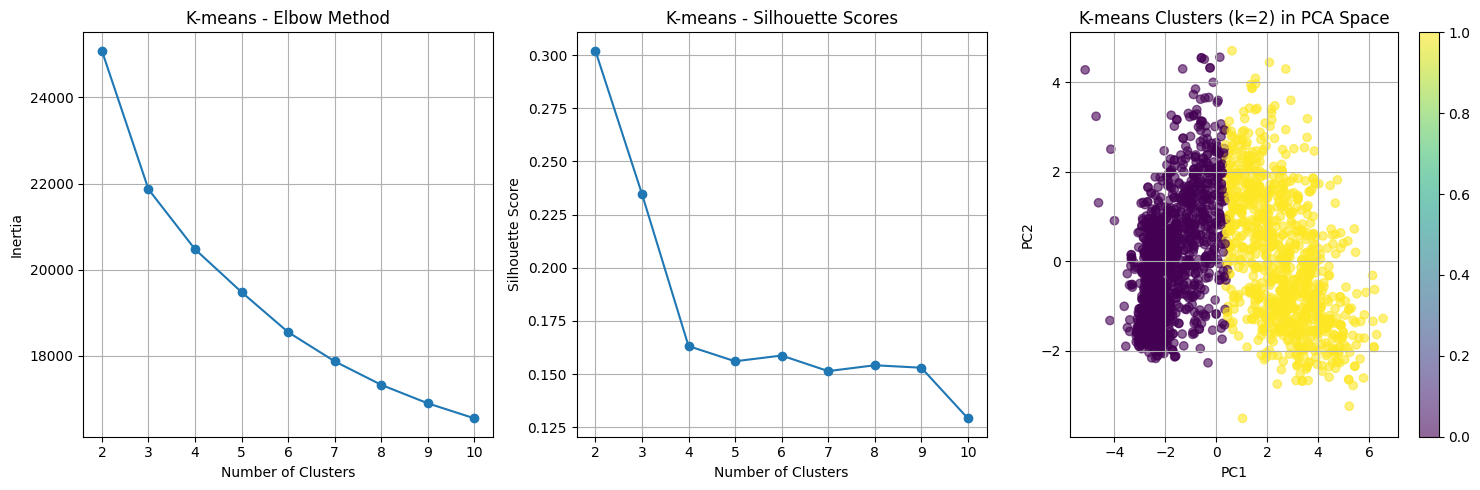


K-means Clustering Metrics:
Silhouette Score: 0.302
Calinski-Harabasz Score: 959.744
Davies-Bouldin Score: 1.448


In [ ]:
# K-means Clustering with Elbow Method and Silhouette Analysis
# Determine optimal number of clusters
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('K-means - Elbow Method')
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('K-means - Silhouette Scores')
plt.grid(True)

# Choose optimal k based on silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters (K-means): {optimal_k}")

# Apply K-means with optimal k
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans_optimal.fit_predict(X_scaled)

# Visualize clusters in PCA space
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'K-means Clusters (k={optimal_k}) in PCA Space')
plt.colorbar(scatter)
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate clustering metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_calinski = calinski_harabasz_score(X_scaled, kmeans_labels)
kmeans_davies = davies_bouldin_score(X_scaled, kmeans_labels)

print(f"\nK-means Clustering Metrics:")
print(f"Silhouette Score: {kmeans_silhouette:.3f}")
print(f"Calinski-Harabasz Score: {kmeans_calinski:.3f}")
print(f"Davies-Bouldin Score: {kmeans_davies:.3f}")


Optimal number of clusters (Hierarchical): 2


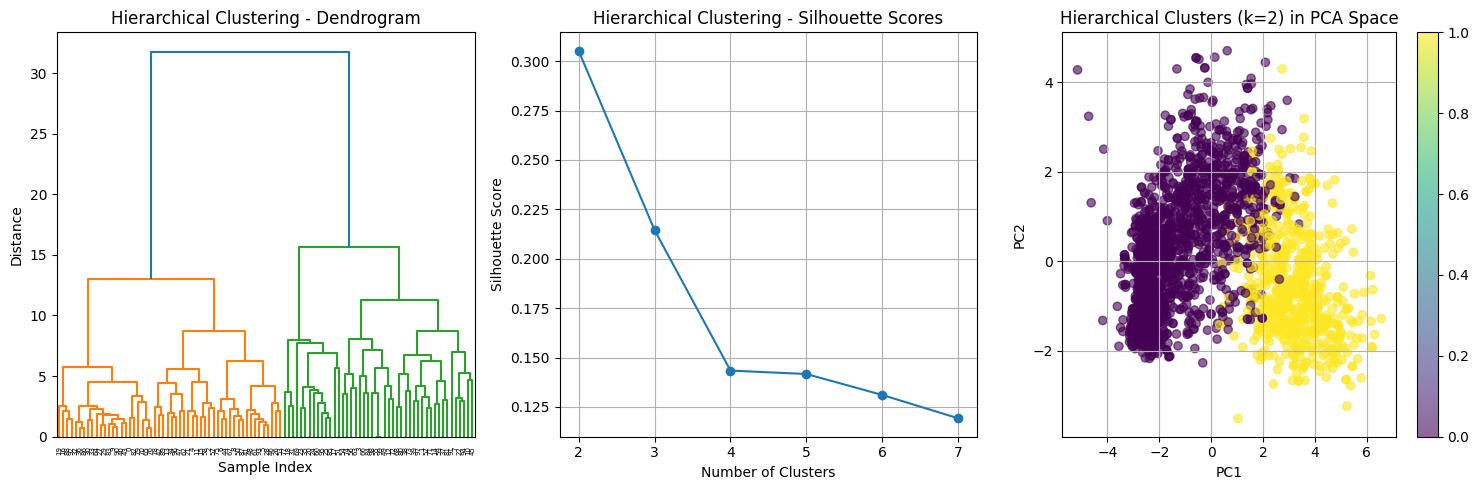


Hierarchical Clustering Metrics:
Silhouette Score: 0.305
Calinski-Harabasz Score: 816.190
Davies-Bouldin Score: 1.478


In [ ]:

# Hierarchical Clustering
plt.figure(figsize=(15, 5))

# Dendrogram
plt.subplot(1, 3, 1)
# Use a sample for dendrogram to avoid overcrowding
sample_indices = np.random.choice(len(X_scaled), size=min(100, len(X_scaled)), replace=False)
X_sample = X_scaled[sample_indices]

Z = linkage(X_sample, method='ward')
dendrogram(Z)
plt.title('Hierarchical Clustering - Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')

# Try different numbers of clusters for hierarchical clustering
hac_silhouette_scores = []
hac_k_range = range(2, 8)

for k in hac_k_range:
    hac = AgglomerativeClustering(n_clusters=k)
    hac_labels = hac.fit_predict(X_scaled)
    hac_silhouette_scores.append(silhouette_score(X_scaled, hac_labels))

plt.subplot(1, 3, 2)
plt.plot(hac_k_range, hac_silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Hierarchical Clustering - Silhouette Scores')
plt.grid(True)

# Choose optimal k for hierarchical clustering
optimal_hac_k = hac_k_range[np.argmax(hac_silhouette_scores)]
print(f"Optimal number of clusters (Hierarchical): {optimal_hac_k}")

# Apply hierarchical clustering with optimal k
hac_optimal = AgglomerativeClustering(n_clusters=optimal_hac_k)
hac_labels = hac_optimal.fit_predict(X_scaled)

# Visualize clusters
plt.subplot(1, 3, 3)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=hac_labels, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Hierarchical Clusters (k={optimal_hac_k}) in PCA Space')
plt.colorbar(scatter)
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate metrics for hierarchical clustering
hac_silhouette = silhouette_score(X_scaled, hac_labels)
hac_calinski = calinski_harabasz_score(X_scaled, hac_labels)
hac_davies = davies_bouldin_score(X_scaled, hac_labels)

print(f"\nHierarchical Clustering Metrics:")
print(f"Silhouette Score: {hac_silhouette:.3f}")
print(f"Calinski-Harabasz Score: {hac_calinski:.3f}")
print(f"Davies-Bouldin Score: {hac_davies:.3f}")

Best DBSCAN parameters: eps=0.10, min_samples=3
Best silhouette score: 1.000

DBSCAN Results:
Number of clusters: 9
Number of noise points: 2212 (98.75%)


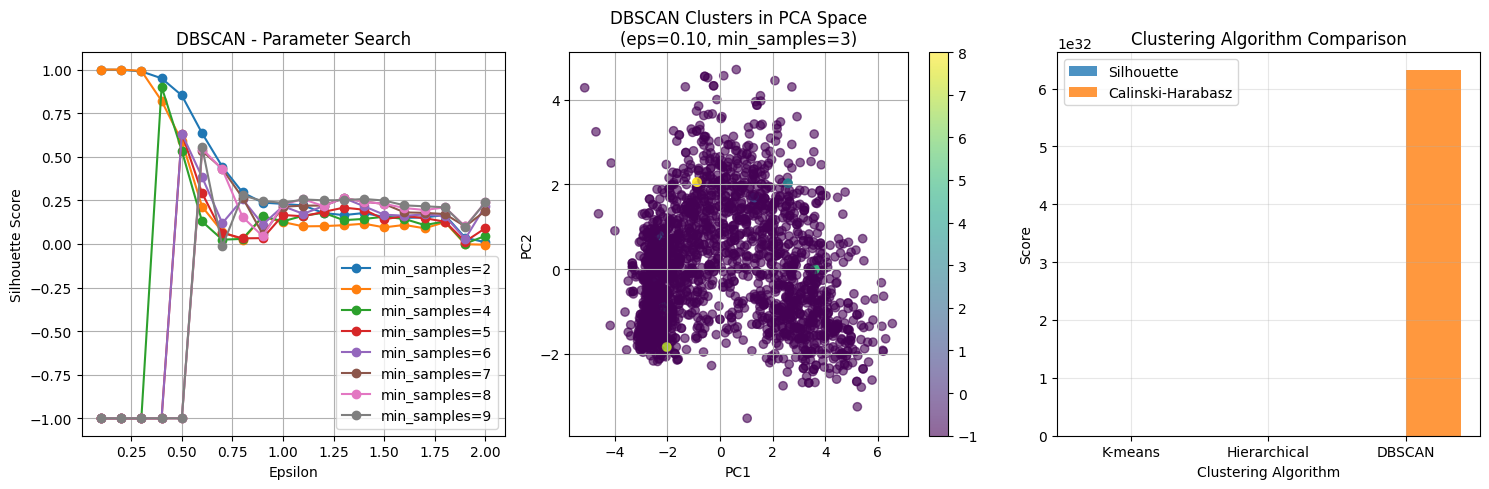

In [ ]:
# DBSCAN Clustering with parameter tuning
plt.figure(figsize=(15, 5))

# Parameter search for DBSCAN
eps_values = np.linspace(0.1, 2.0, 20)
min_samples_values = range(2, 10)

best_eps = None
best_min_samples = None
best_silhouette = -1
dbscan_results = []

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_scaled)

        # Only calculate silhouette if we have more than 1 cluster and no noise points dominate
        unique_labels = np.unique(labels)
        n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

        if n_clusters > 1 and n_clusters < len(X_scaled) // 2:
            silhouette_avg = silhouette_score(X_scaled[labels != -1], labels[labels != -1]) \
                           if len(np.unique(labels[labels != -1])) > 1 else -1
        else:
            silhouette_avg = -1

        dbscan_results.append({
            'eps': eps,
            'min_samples': min_samples,
            'silhouette': silhouette_avg,
            'n_clusters': n_clusters,
            'noise_points': np.sum(labels == -1)
        })

        if silhouette_avg > best_silhouette and n_clusters > 1:
            best_silhouette = silhouette_avg
            best_eps = eps
            best_min_samples = min_samples

# Convert results to DataFrame for easier analysis
dbscan_df = pd.DataFrame(dbscan_results)

# Plot parameter search results
plt.subplot(1, 3, 1)
for min_samples in min_samples_values:
    subset = dbscan_df[dbscan_df['min_samples'] == min_samples]
    plt.plot(subset['eps'], subset['silhouette'], marker='o', label=f'min_samples={min_samples}')
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('DBSCAN - Parameter Search')
plt.legend()
plt.grid(True)

print(f"Best DBSCAN parameters: eps={best_eps:.2f}, min_samples={best_min_samples}")
print(f"Best silhouette score: {best_silhouette:.3f}")

# Apply DBSCAN with best parameters
dbscan_optimal = DBSCAN(eps=best_eps, min_samples=best_min_samples)
dbscan_labels = dbscan_optimal.fit_predict(X_scaled)

# Analyze DBSCAN results
unique_labels = np.unique(dbscan_labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
n_noise = np.sum(dbscan_labels == -1)

print(f"\nDBSCAN Results:")
print(f"Number of clusters: {n_clusters}")
print(f"Number of noise points: {n_noise} ({n_noise/len(dbscan_labels):.2%})")

# Visualize DBSCAN clusters
plt.subplot(1, 3, 2)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', alpha=0.6)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'DBSCAN Clusters in PCA Space\n(eps={best_eps:.2f}, min_samples={best_min_samples})')
plt.colorbar(scatter)
plt.grid(True)

# Compare clustering algorithms
algorithms = ['K-means', 'Hierarchical', 'DBSCAN']
silhouette_scores = [kmeans_silhouette, hac_silhouette, best_silhouette]
calinski_scores = [kmeans_calinski, hac_calinski, calinski_harabasz_score(X_scaled[dbscan_labels != -1],
                                                                         dbscan_labels[dbscan_labels != -1])
                  if n_clusters > 1 else 0]

plt.subplot(1, 3, 3)
x_pos = np.arange(len(algorithms))
plt.bar(x_pos - 0.2, silhouette_scores, 0.4, label='Silhouette', alpha=0.8)
plt.bar(x_pos + 0.2, calinski_scores, 0.4, label='Calinski-Harabasz', alpha=0.8)
plt.xlabel('Clustering Algorithm')
plt.ylabel('Score')
plt.title('Clustering Algorithm Comparison')
plt.xticks(x_pos, algorithms)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Cluster Profiles:
           Income           Year_Birth Kidhome Teenhome Recency MntWines  \
             mean       std       mean    mean     mean    mean     mean   
Cluster                                                                    
0        38694.50  15142.64    1970.15    0.71     0.55   48.83   102.19   
1        71585.26  23629.12    1966.89    0.07     0.44   49.51   591.80   

        MntMeatProducts NumWebPurchases NumStorePurchases NumCatalogPurchases  \
                   mean            mean              mean                mean   
Cluster                                                                         
0                 35.81            2.91              3.87                0.86   
1                354.07            5.76              8.52                5.24   

        NumDealsPurchases Response  
                     mean     mean  
Cluster                             
0                    2.57     0.10  
1                    1.98     0.22  


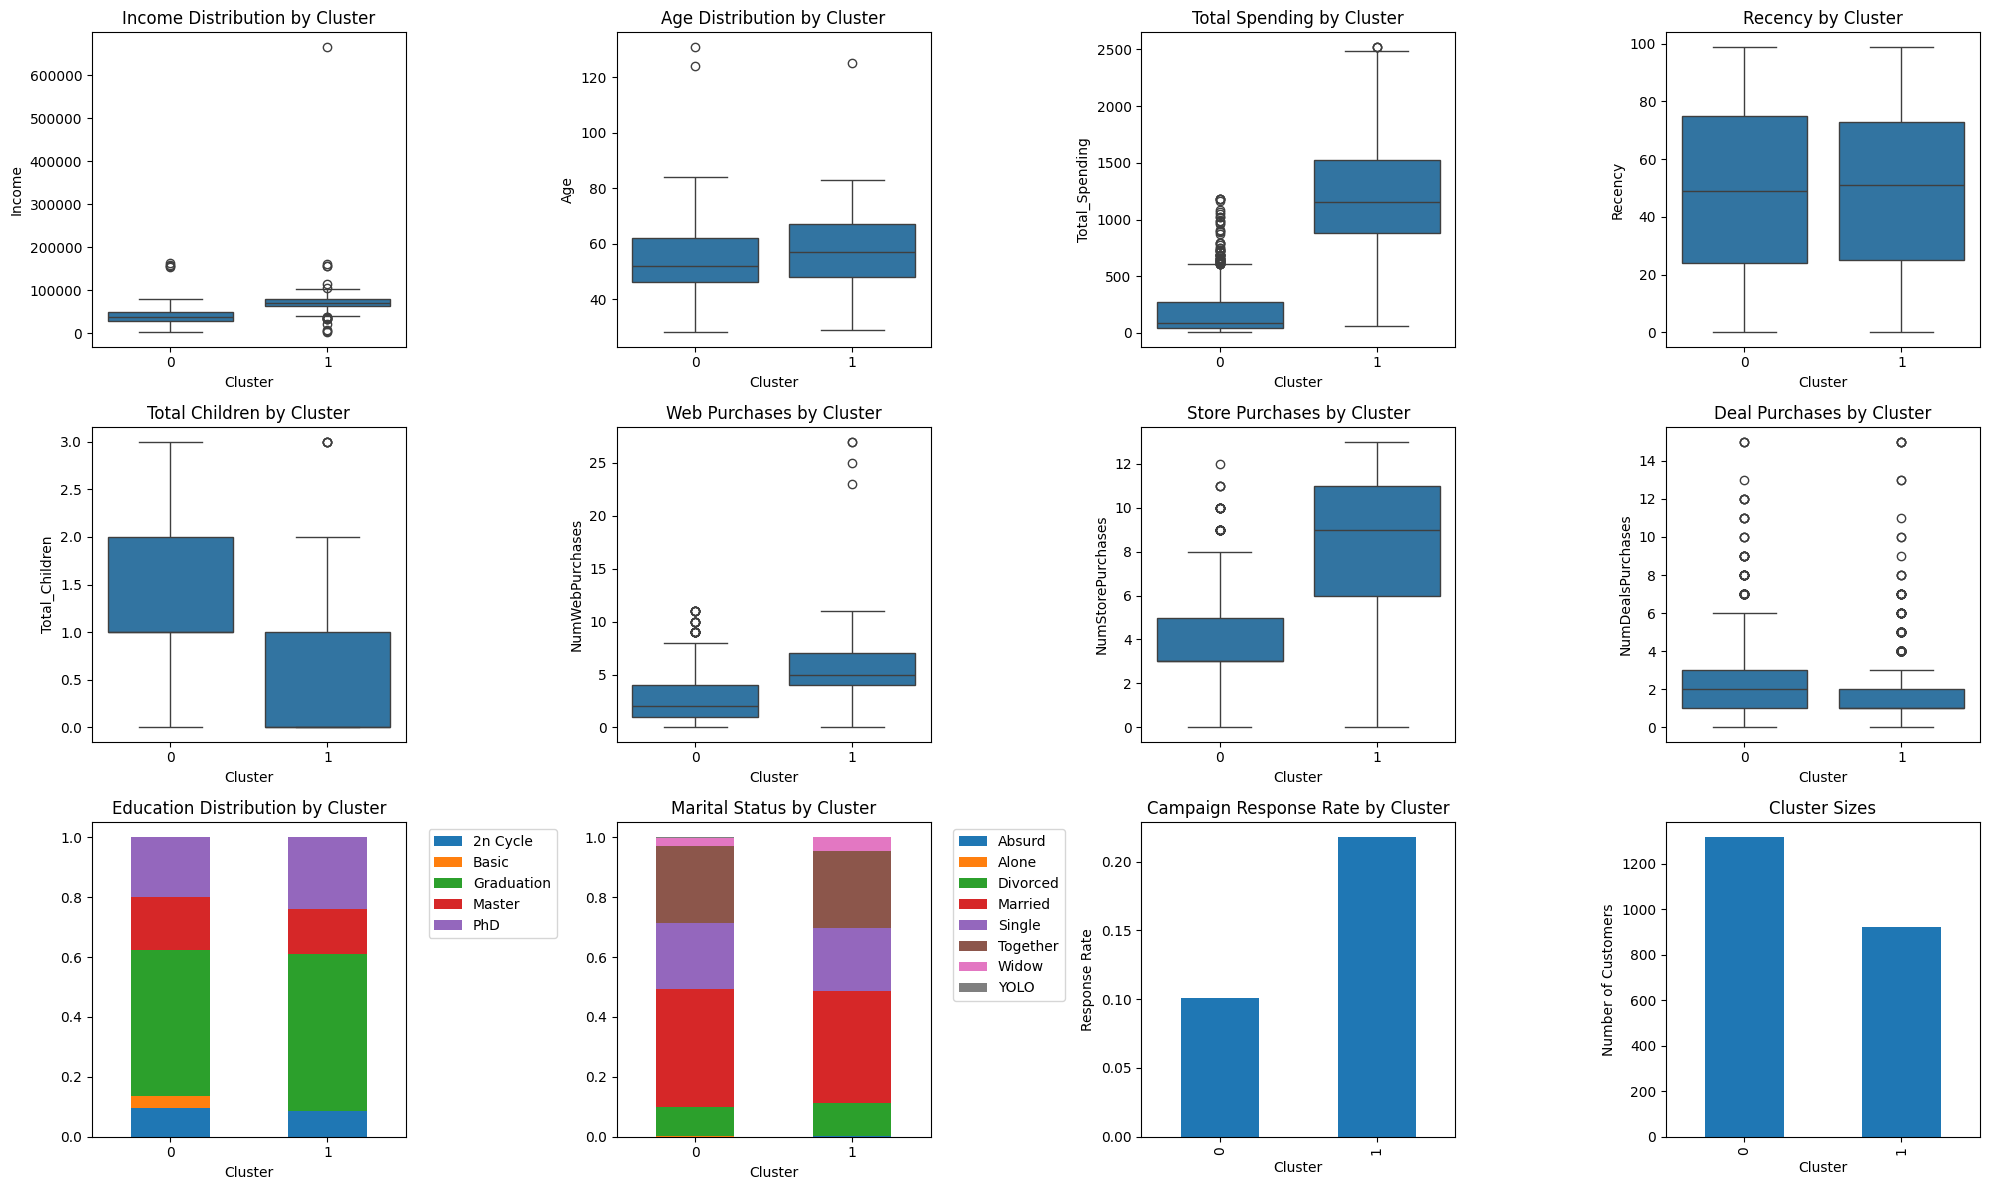

In [ ]:
# Cluster interpretation and profiling
# Use K-means as the final clustering (usually performs well)
final_clusters = kmeans_labels

# Add cluster labels to the original dataframe
df['Cluster'] = final_clusters

# Analyze cluster characteristics
cluster_profiles = df.groupby('Cluster').agg({
    'Income': ['mean', 'std'],
    'Year_Birth': 'mean',
    'Kidhome': 'mean',
    'Teenhome': 'mean',
    'Recency': 'mean',
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumDealsPurchases': 'mean',
    'Response': 'mean'
}).round(2)

print("Cluster Profiles:")
print(cluster_profiles)

# Visualize cluster characteristics
plt.figure(figsize=(20, 12))

# 1. Income distribution by cluster
plt.subplot(3, 4, 1)
sns.boxplot(data=df, x='Cluster', y='Income')
plt.title('Income Distribution by Cluster')

# 2. Age distribution (calculated from Year_Birth)
df['Age'] = 2024 - df['Year_Birth']  # Assuming current year is 2024
plt.subplot(3, 4, 2)
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title('Age Distribution by Cluster')

# 3. Total spending by cluster
df['Total_Spending'] = df[spending_cols].sum(axis=1)
plt.subplot(3, 4, 3)
sns.boxplot(data=df, x='Cluster', y='Total_Spending')
plt.title('Total Spending by Cluster')

# 4. Recency by cluster
plt.subplot(3, 4, 4)
sns.boxplot(data=df, x='Cluster', y='Recency')
plt.title('Recency by Cluster')

# 5. Number of children by cluster
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
plt.subplot(3, 4, 5)
sns.boxplot(data=df, x='Cluster', y='Total_Children')
plt.title('Total Children by Cluster')

# 6. Web purchases by cluster
plt.subplot(3, 4, 6)
sns.boxplot(data=df, x='Cluster', y='NumWebPurchases')
plt.title('Web Purchases by Cluster')

# 7. Store purchases by cluster
plt.subplot(3, 4, 7)
sns.boxplot(data=df, x='Cluster', y='NumStorePurchases')
plt.title('Store Purchases by Cluster')

# 8. Deal purchases by cluster
plt.subplot(3, 4, 8)
sns.boxplot(data=df, x='Cluster', y='NumDealsPurchases')
plt.title('Deal Purchases by Cluster')

# 9. Education distribution by cluster
plt.subplot(3, 4, 9)
cluster_education = pd.crosstab(df['Cluster'], df['Education'], normalize='index')
cluster_education.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Education Distribution by Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 10. Marital status by cluster
plt.subplot(3, 4, 10)
cluster_marital = pd.crosstab(df['Cluster'], df['Marital_Status'], normalize='index')
cluster_marital.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Marital Status by Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Campaign response by cluster
plt.subplot(3, 4, 11)
response_rate = df.groupby('Cluster')['Response'].mean()
response_rate.plot(kind='bar')
plt.title('Campaign Response Rate by Cluster')
plt.ylabel('Response Rate')

# 12. Cluster sizes
plt.subplot(3, 4, 12)
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_sizes.plot(kind='bar')
plt.title('Cluster Sizes')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


Cluster Profiles:
           Income           Year_Birth Kidhome Teenhome Recency MntWines  \
             mean       std       mean    mean     mean    mean     mean   
Cluster                                                                    
0        38694.50  15142.64    1970.15    0.71     0.55   48.83   102.19   
1        71585.26  23629.12    1966.89    0.07     0.44   49.51   591.80   

        MntMeatProducts NumWebPurchases NumStorePurchases NumCatalogPurchases  \
                   mean            mean              mean                mean   
Cluster                                                                         
0                 35.81            2.91              3.87                0.86   
1                354.07            5.76              8.52                5.24   

        NumDealsPurchases Response  
                     mean     mean  
Cluster                             
0                    2.57     0.10  
1                    1.98     0.22  


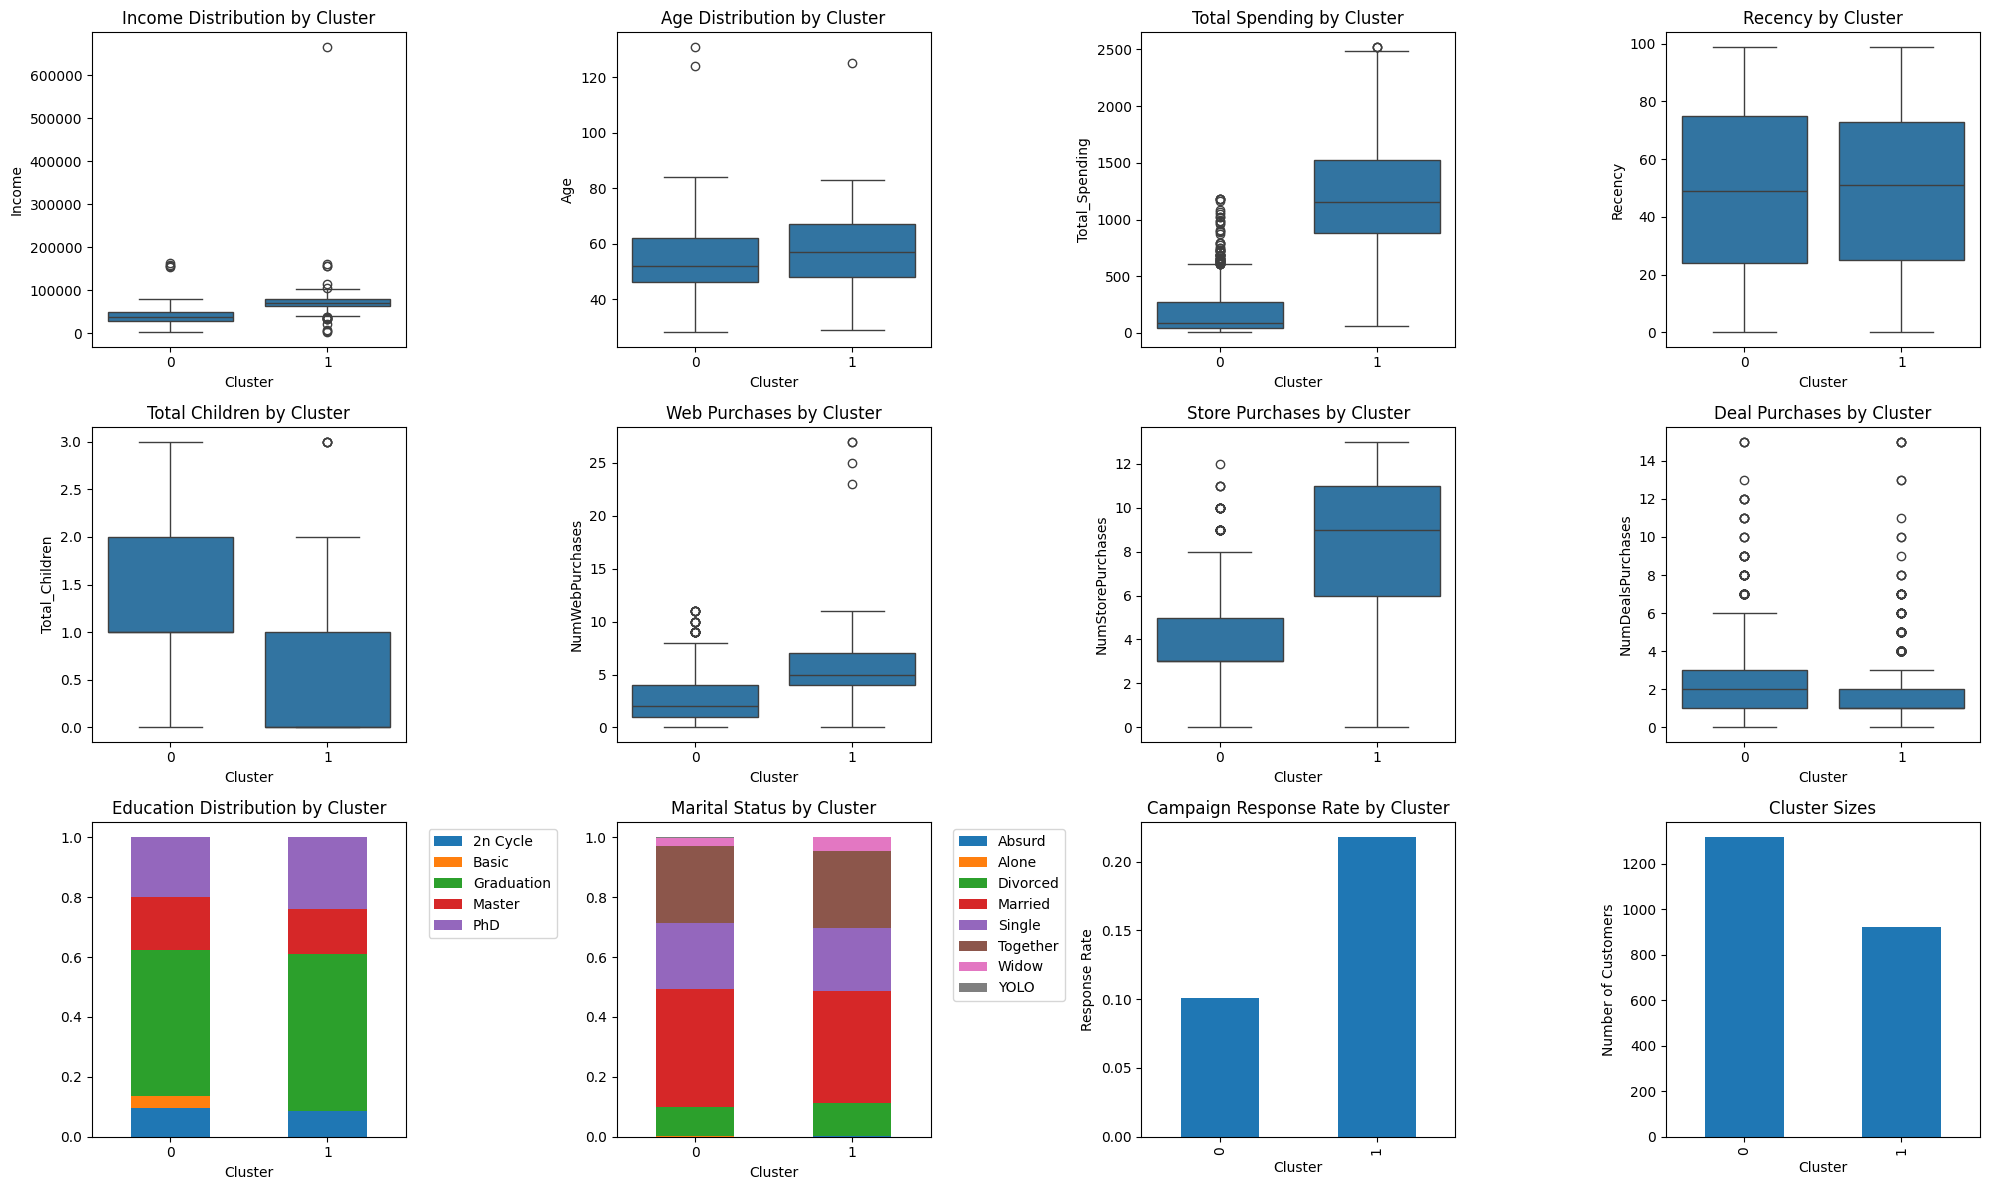

In [ ]:


# Cluster interpretation and profiling
# Use K-means as the final clustering (usually performs well)
final_clusters = kmeans_labels

# Add cluster labels to the original dataframe
df['Cluster'] = final_clusters

# Analyze cluster characteristics
cluster_profiles = df.groupby('Cluster').agg({
    'Income': ['mean', 'std'],
    'Year_Birth': 'mean',
    'Kidhome': 'mean',
    'Teenhome': 'mean',
    'Recency': 'mean',
    'MntWines': 'mean',
    'MntMeatProducts': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean',
    'NumCatalogPurchases': 'mean',
    'NumDealsPurchases': 'mean',
    'Response': 'mean'
}).round(2)

print("Cluster Profiles:")
print(cluster_profiles)

# Visualize cluster characteristics
plt.figure(figsize=(20, 12))

# 1. Income distribution by cluster
plt.subplot(3, 4, 1)
sns.boxplot(data=df, x='Cluster', y='Income')
plt.title('Income Distribution by Cluster')

# 2. Age distribution (calculated from Year_Birth)
df['Age'] = 2024 - df['Year_Birth']  # Assuming current year is 2024
plt.subplot(3, 4, 2)
sns.boxplot(data=df, x='Cluster', y='Age')
plt.title('Age Distribution by Cluster')

# 3. Total spending by cluster
df['Total_Spending'] = df[spending_cols].sum(axis=1)
plt.subplot(3, 4, 3)
sns.boxplot(data=df, x='Cluster', y='Total_Spending')
plt.title('Total Spending by Cluster')

# 4. Recency by cluster
plt.subplot(3, 4, 4)
sns.boxplot(data=df, x='Cluster', y='Recency')
plt.title('Recency by Cluster')

# 5. Number of children by cluster
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
plt.subplot(3, 4, 5)
sns.boxplot(data=df, x='Cluster', y='Total_Children')
plt.title('Total Children by Cluster')

# 6. Web purchases by cluster
plt.subplot(3, 4, 6)
sns.boxplot(data=df, x='Cluster', y='NumWebPurchases')
plt.title('Web Purchases by Cluster')

# 7. Store purchases by cluster
plt.subplot(3, 4, 7)
sns.boxplot(data=df, x='Cluster', y='NumStorePurchases')
plt.title('Store Purchases by Cluster')

# 8. Deal purchases by cluster
plt.subplot(3, 4, 8)
sns.boxplot(data=df, x='Cluster', y='NumDealsPurchases')
plt.title('Deal Purchases by Cluster')

# 9. Education distribution by cluster
plt.subplot(3, 4, 9)
cluster_education = pd.crosstab(df['Cluster'], df['Education'], normalize='index')
cluster_education.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Education Distribution by Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 10. Marital status by cluster
plt.subplot(3, 4, 10)
cluster_marital = pd.crosstab(df['Cluster'], df['Marital_Status'], normalize='index')
cluster_marital.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Marital Status by Cluster')
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# 11. Campaign response by cluster
plt.subplot(3, 4, 11)
response_rate = df.groupby('Cluster')['Response'].mean()
response_rate.plot(kind='bar')
plt.title('Campaign Response Rate by Cluster')
plt.ylabel('Response Rate')

# 12. Cluster sizes
plt.subplot(3, 4, 12)
cluster_sizes = df['Cluster'].value_counts().sort_index()
cluster_sizes.plot(kind='bar')
plt.title('Cluster Sizes')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()